# **About Dataset**
# *Data Science Job Salaries Dataset contains 11 columns, each are:*
work_year: The year the salary was paid.

experience_level: The experience level in the job during the year

employment_type: The type of employment for the role

job_title: The role worked in during the year.

salary: The total gross salary amount paid.

salary_currency: The currency of the salary paid as an ISO 4217 currency code.

salaryinusd: The salary in USD

employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.

remote_ratio: The overall amount of work done remotely

company_location: The country of the employer's main office or contracting branch

company_size: The median number of people that worked for the company during the year

In [1]:
# Install the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data set
data=pd.read_csv('C:/Users/USER/Desktop/ds_salaries.csv')
#visualize the top five rows in the data using the head function
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


# *Data Preprocessing*

In [7]:
#print the shape of the data set
print(f'In the Data rows is {data.shape[0]} and column is {data.shape[1]}')

In the Data rows is 3755 and column is 11


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [8]:
data.describe().style.background_gradient(cmap="Reds")

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3755.000000,3755.000000,3755.000000
mean,2022.373635,190695.571771,137570.389880,46.271638
std,0.691448,671676.500508,63055.625278,48.589050
min,2020.000000,6000.000000,5132.000000,0.000000
25%,2022.000000,100000.000000,95000.000000,0.000000
50%,2022.000000,138000.000000,135000.000000,0.000000
75%,2023.000000,180000.000000,175000.000000,100.000000
max,2023.000000,30400000.000000,450000.000000,100.000000


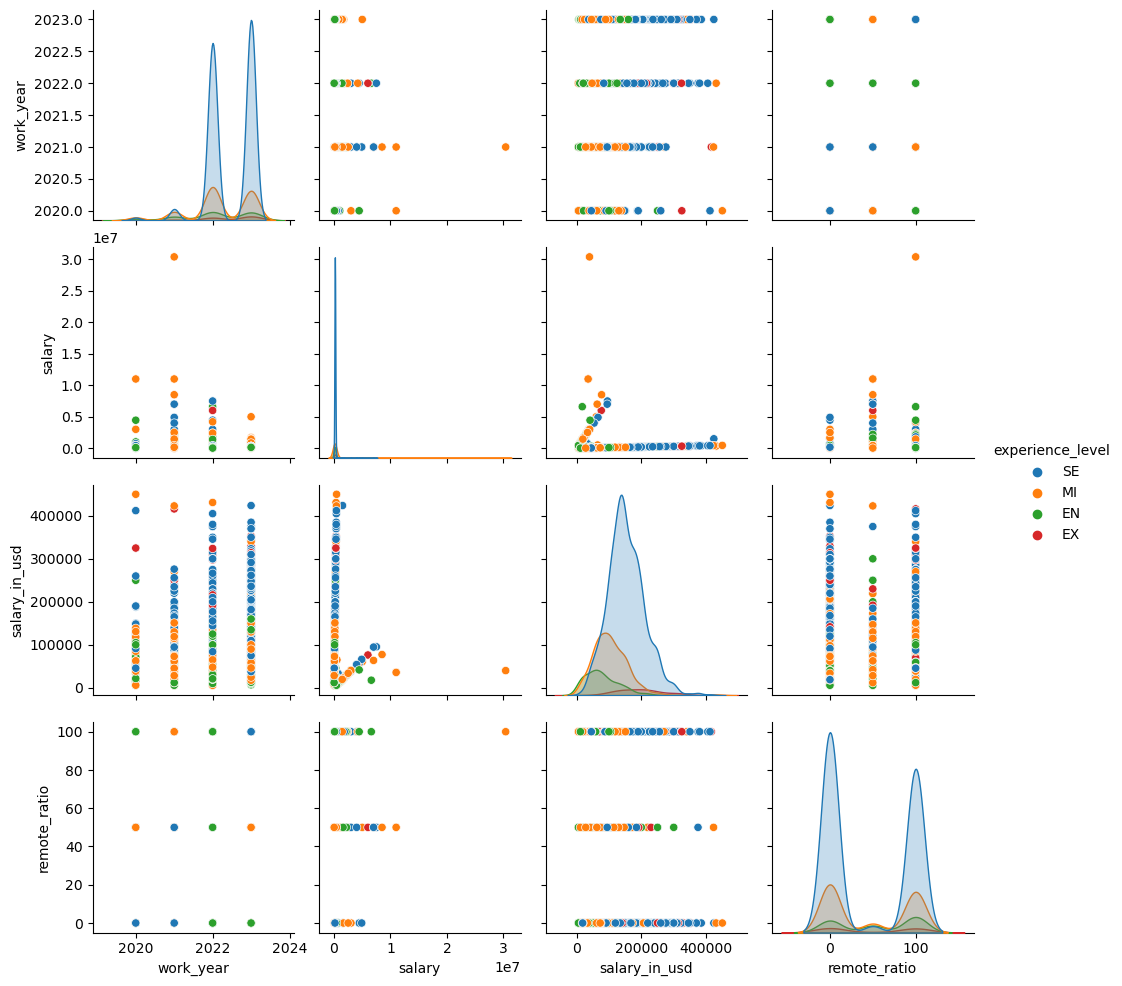

In [10]:
sns.pairplot(data,kind='scatter',hue='experience_level')

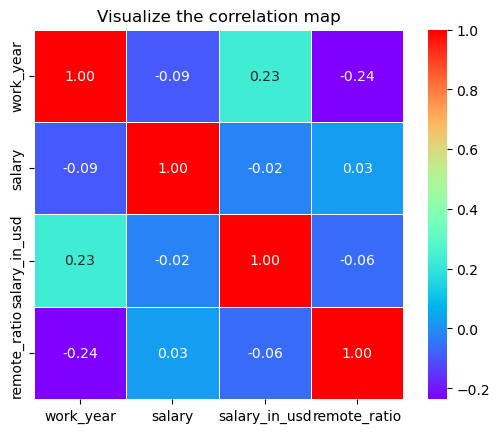

In [16]:
corr = data.select_dtypes("number").corr()
sns.heatmap(corr,annot=True,cmap='rainbow',fmt='.2f',
    square=True,
    linewidths=.5)
plt.title("Visualize the correlation map")
plt.show()

# **Observations:**
1.In the Correlation map it's clearly understand some columns are have negative correlation

2.Work year column negative correlation with Salary and Remote_ratio

3.Salary column should be negative ralation with Year and salary in usd

4.Salary in used is also negative realtion with salary and remote ration

5.remote ratio is also neagtive raltion with work year and salary in usd

# Explore Data Analysis (EDA Process)
# *Questions asked in the data*
+ Identify the Which year most data Scientist salaries Posted using the bar chart.
+ Identify the Which type of the people have in the data set using the pie chart.
+ Understanding the Salary in usd with Experience wise using the histogram.
+ Which Type of companys pay more salary as a data Scientist
+ Which type of Expreience people get more salary in the data set
+ Visualize the bar chart the average salary for the data scientist job title
+ Find the Sum of the salary with Remote wise
+ Also find the Visualize the Employement Status and Full time with status.
+ Find the Average salary with location wise
+ Find the top 10 jobs in the USA
+ Find the Top highpaying jobs in the medium and small companys
+ In the medium company which emplyoee ment posisition get paid.

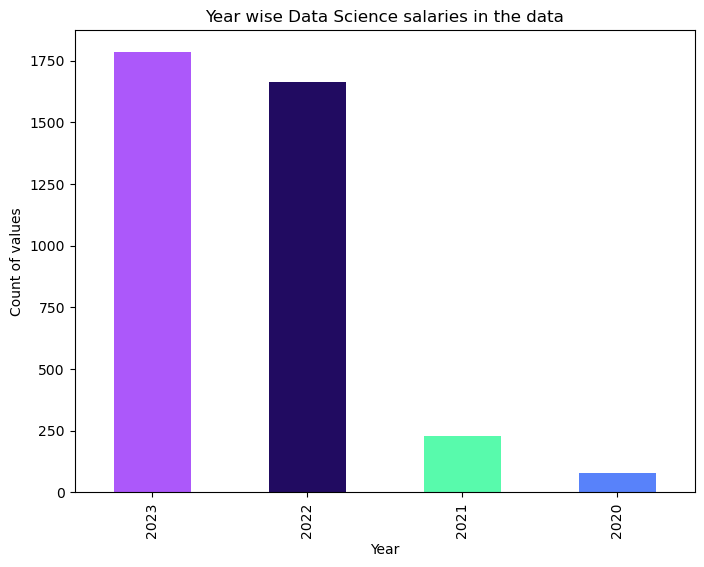

In [18]:
# Identify the which year most of the data scientist salaries posted in the data
data['work_year'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(8,6),title="Year wise Data Science salaries in the data",color=['#AC58FA','#210B61','#58FAAC','#5882FA'])
plt.xlabel("Year")
plt.ylabel("Count of values")
plt.show()

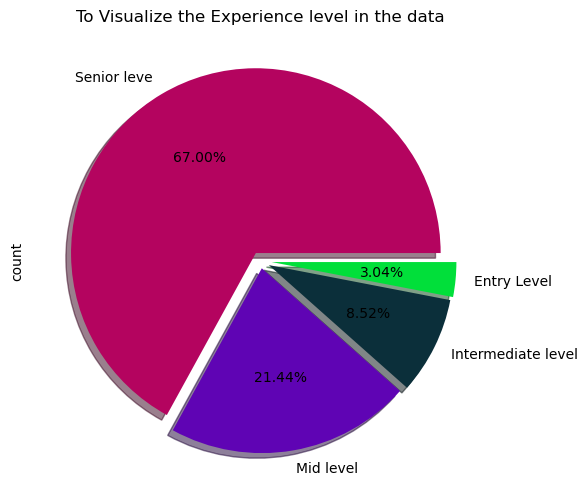

In [19]:
#Create a pie chart understand the what experience people contains the companys in the data set
data['experience_level'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',figsize=(8,6),title="To Visualize the Experience level in the data",explode=[0.05,0.04,0.05,0.06],
    labels=['Senior leve','Mid level','Intermediate level','Entry Level'],
    colors=['#B4045F','#5F04B4','#0B2F3A','#01DF3A'],
    autopct='%1.2f%%',
    shadow=True)
plt.show()

# Observations:
# *bar chart*
+ In the year 2023 most of the data scientist salaries posted compare to the other years
+ In 2020 we get received the less data scientist salaries
# *Pie Chart*
+ In the pie chart we observe most of the company hire senior roles as data scientist it means 67 % employess are senior level Data Scientist
+ Only 3 % people recurite the entry level data scientist

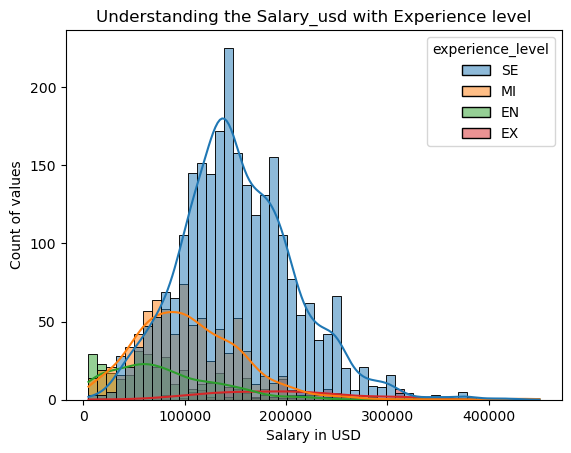

In [20]:
'''Create histogram to understanding Salary with Expreience wise'''
sns.histplot(data=data,x='salary_in_usd',hue='experience_level',bins=50,stat='count',kde=True)
plt.title("Understanding the Salary_usd with Experience level")
plt.xlabel("Salary in USD")
plt.ylabel("Count of values")
plt.show()

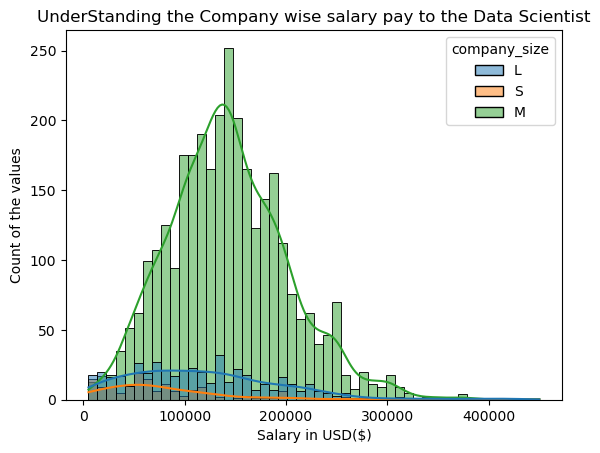

In [21]:
# Let's Create a histogram with company wise paying the more salary as daat scientist
sns.histplot(data=data,x='salary_in_usd',hue='company_size',bins=50,stat='count',kde=True)
plt.title("UnderStanding the Company wise salary pay to the Data Scientist")
plt.xlabel("Salary in USD($)")
plt.ylabel("Count of the values")
plt.show()

# Observations:
+ From the Two histogram we observed some intresting thing about company size and expeience level along with salary in usd
+ In the First chart most of the senior employee recived 100k to 300K
+ Middle level data scientist get nearly 100k to 300k
+ intermediate and entry level people gets' 0 to 100k and some entry level peopel get 300k
+ In the Second chart we visualize the company size with salary in usd
+ Large companys pays well as a data scientist the range should be 5 k to 400k
+ medium compays also have highest data scientist with pay range 10 k to 350k

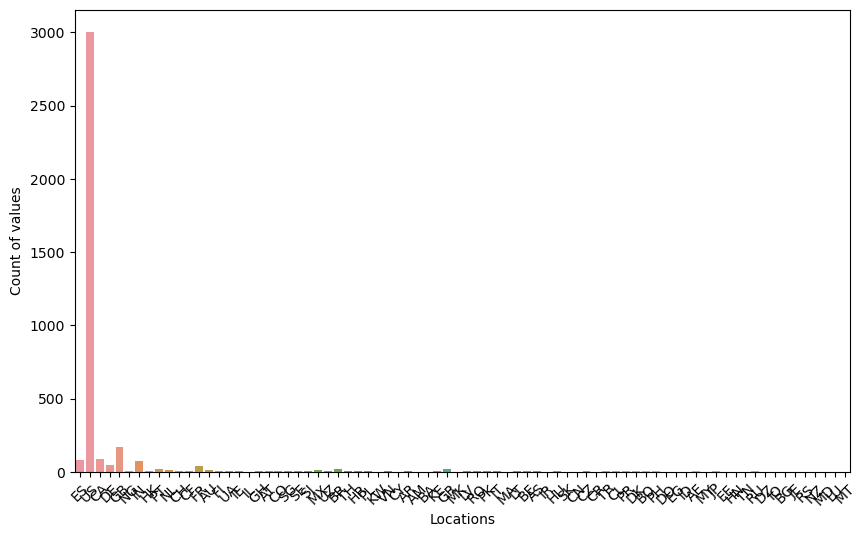

In [22]:
#Visualize the employee_residence in the data using the countplot
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='employee_residence')
plt.xticks(rotation=45)
plt.xlabel("Locations")
plt.ylabel("Count of values")
plt.show()

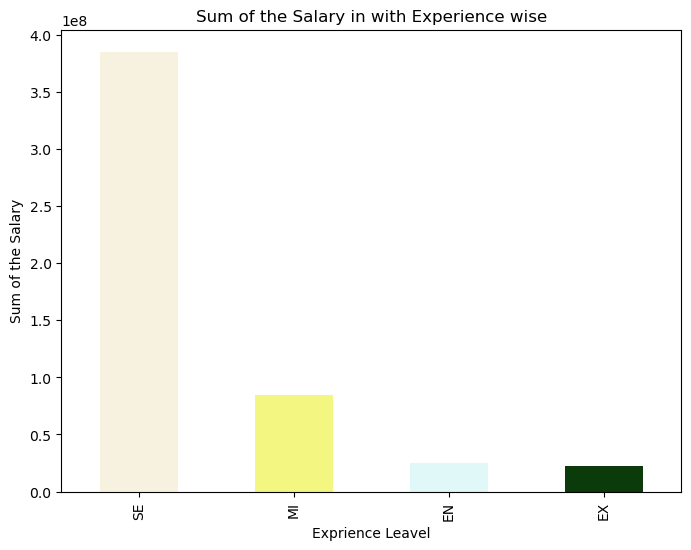

In [23]:
'''
Find the Sum of the salay in usd with experience wise visualize with bar chart
and sort the values
'''
data.groupby(['experience_level'])['salary_in_usd'].sum().sort_values(ascending=False)\
.plot(kind='bar',title="Sum of the Salary in with Experience wise",figsize=(8,6),color=['#F7F2E0','#F3F781','#E0F8F7','#0B3B0B'])
plt.xlabel("Exprience Leavel")
plt.ylabel("Sum of the Salary")
plt.show()

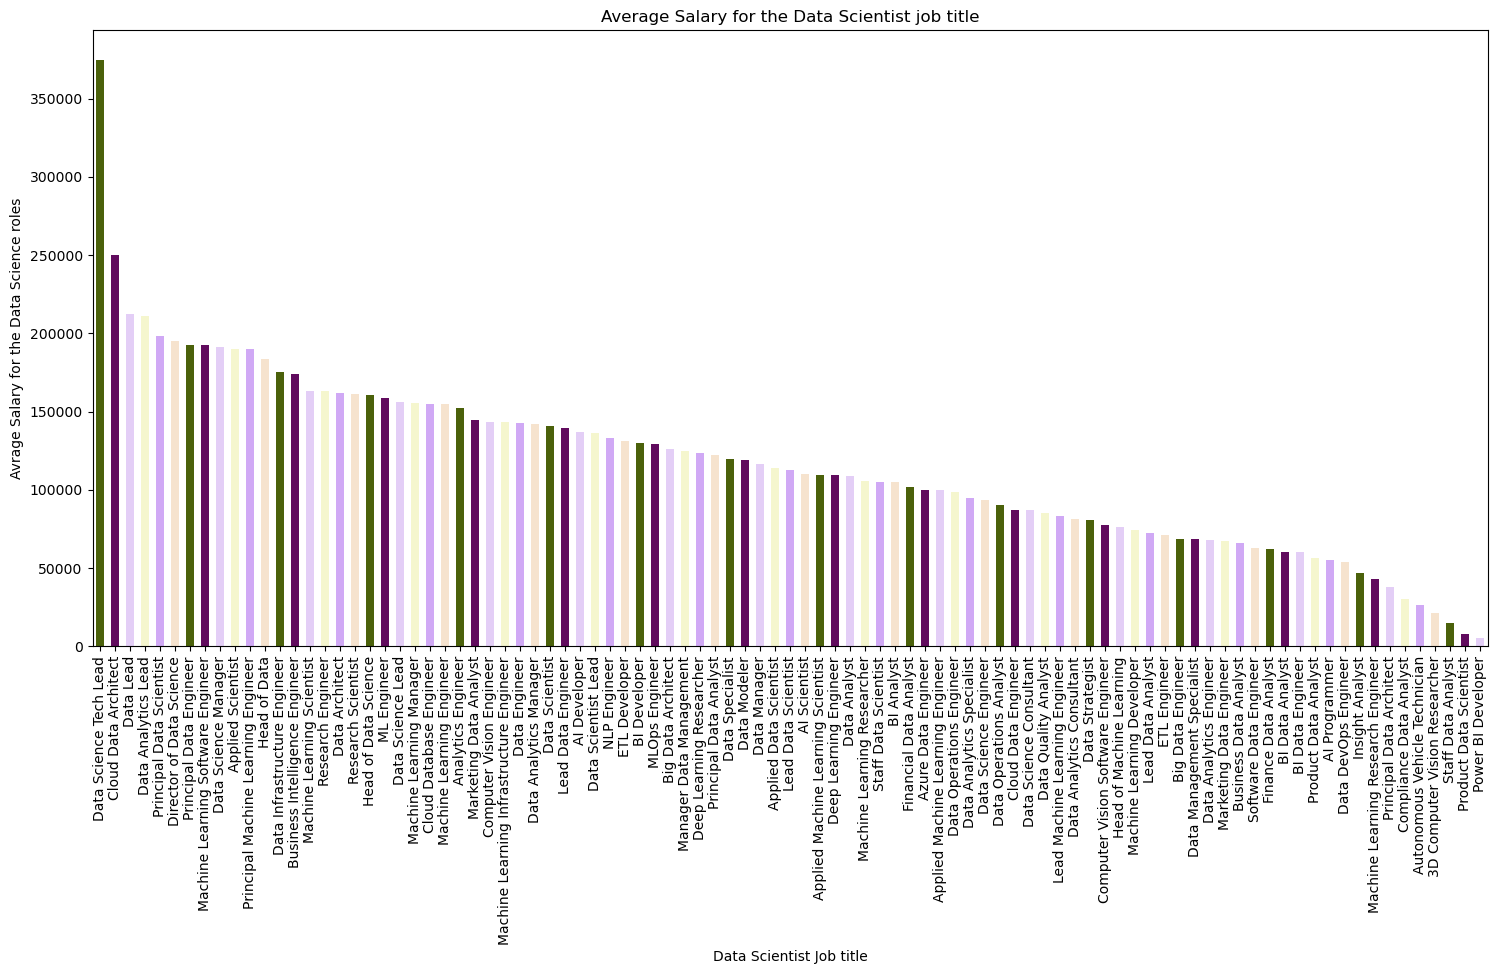

In [25]:
data.groupby(['job_title'])['salary_in_usd'].mean().sort_values(ascending=False)\
.plot(kind='bar',figsize=(18,8),title="Average Salary for the Data Scientist job title",color=['#4B610B','#610B5E','#E3CEF6','#F5F6CE','#D0A9F5','#F6E3CE'])
plt.xlabel("Data Scientist Job title")
plt.ylabel("Avrage Salary for the Data Science roles")
plt.xticks(rotation=90)
plt.show()

# Observations:
+ From the two chart we observed several informations
+ Senior people we received more salary compare to the remaing expreience people and less salay get as entry level Expreience people
+ In the Second chart Data Science tech Lead get the highest average salary compare to other and Power bi developer get less salary compare to the others roels.

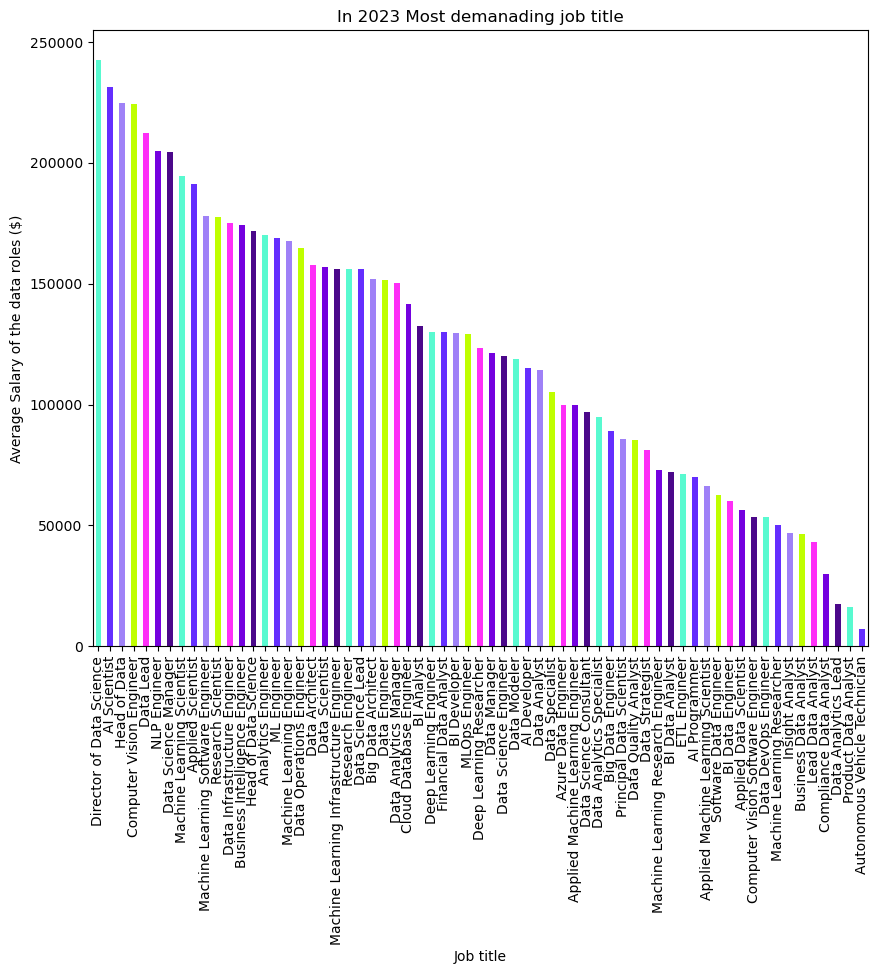

In [26]:
# In 2023 we visualze the job title with Salary wise
data_23=data['work_year']==2023
data.loc[data_23].groupby(['job_title'])['salary_in_usd'].mean().sort_values(ascending=False)\
.plot(kind='bar',figsize=(10,8),title="In 2023 Most demanading job title",color=['#58FAD0','#642EFE','#9F81F7','#BFFF00','#FE2EF7','#7401DF','#4B088A'])
plt.xlabel("Job title")
plt.ylabel("Average Salary of the data roles ($)")
plt.show()

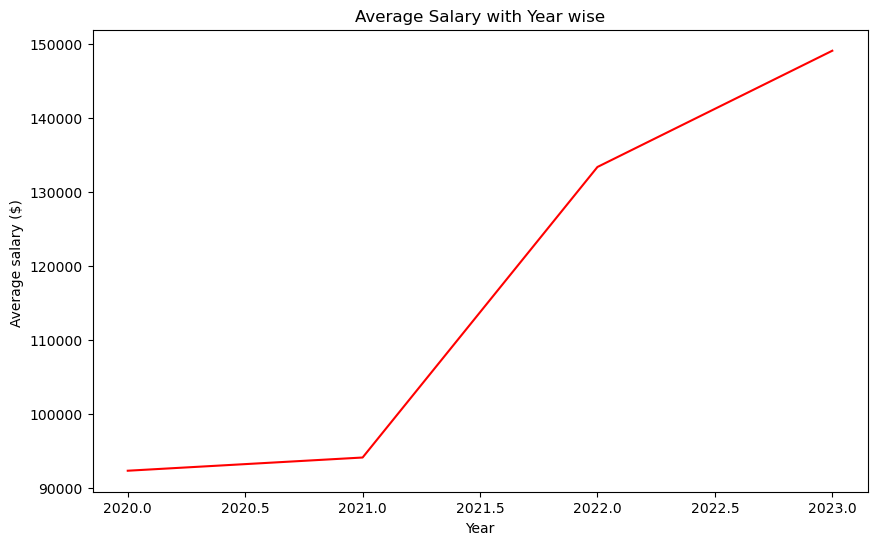

In [27]:
#Understanding the Average salary in usd with year wise using the line chart 
data.groupby(['work_year'])['salary_in_usd'].mean().sort_values(ascending=False)\
.plot(kind='line',figsize=(10,6),title="Average Salary with Year wise",color='#FF0000')
plt.xlabel("Year")
plt.ylabel("Average salary ($) ")
plt.show()

# Observations:
+ In the 2023 year Director of the Data scientis get more salary compare to the other roles
+ In the 2023 Autonomus vehical technician title get less salary
+ In the line Chart 2020 the sum of the salary less and the salary also increase every year we show in the line chart.

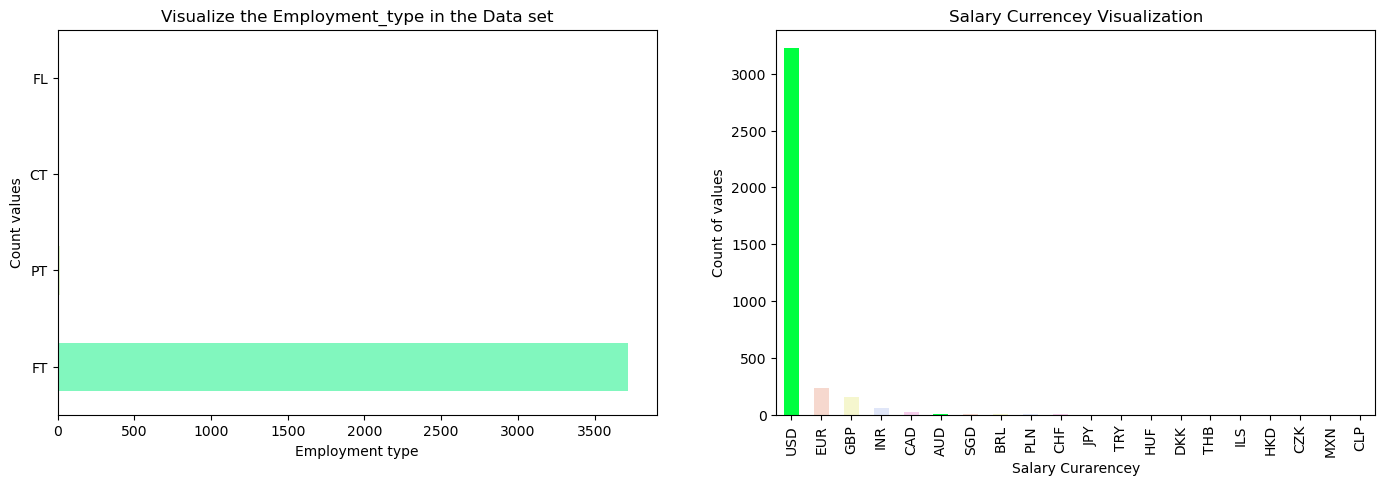

In [28]:
#Checking the Employment stastus and currency items using barh and bar plots
plt.subplots(1,2,figsize=(17,5))
plt.subplot(121)
data['employment_type'].value_counts().sort_values(ascending=False)\
.plot(kind='barh',title='Visualize the Employment type',color=['#81F7BE','#E3F6CE','#E3CEF6','#F5A9E1'])
plt.xlabel("Employment type")
plt.ylabel("Count values")
plt.title("Visualize the Employment_type in the Data set")
plt.subplot(122)
data['salary_currency'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',title="Salary Currencey Visualization",color=['#00FF40','#F6D8CE','#F5F6CE','#E0E6F8','#F6CEEC'])
plt.xlabel("Salary Curarencey")
plt.ylabel("Count of values")
plt.show()

# Observations:
+ From the Above two chart what we abserved full time employes get more salary compare to the part time employess
+ all the salary should in the USD values and next EUR is the second place in the salary curancy

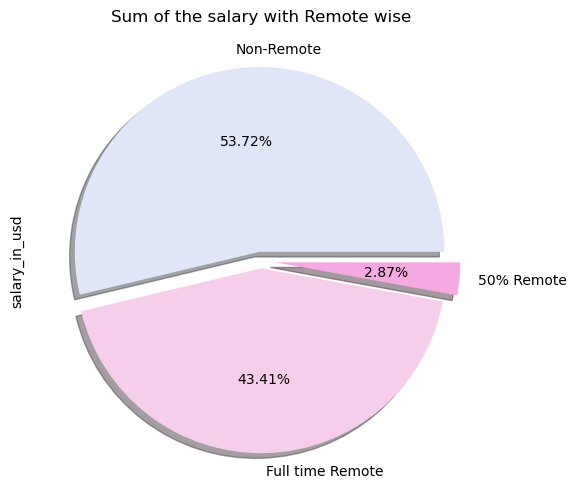

In [29]:
#Find the sum of the salary with remote ration wise using the groupby functions 
data.groupby('remote_ratio')['salary_in_usd'].sum().sort_values(ascending=False)\
.plot(kind='pie',figsize=(8,6),title="Sum of the salary with Remote wise",explode=[0.05,0.04,0.08],
    labels=['Non-Remote','Full time Remote','50% Remote'],
    colors=['#E0E6F8','#F6CEEC','#F5A9E1'],
    autopct='%1.2f%%',
    shadow=True,
     radius=1,
     center=(10,5))
plt.show()

In [30]:
#Create a pivot _table to undestanding the how much the pay salary in location wise with the company size
table=pd.pivot_table(data=data,index='company_location',values='salary_in_usd',columns='company_size',aggfunc='sum')
table.head()

company_size,L,M,S
company_location,,,
AE,115000.0,NaN,185000.0
AL,NaN,NaN,10000.0
AM,NaN,NaN,50000.0
AR,62000.0,NaN,13000.0
AS,50000.0,20000.0,18053.0


In [31]:
#Find the highest and lowest salary in the dataset
find_the_highest_salary = data.loc[data['salary_in_usd'].idxmax()]['job_title']
print("The Highest salary in the data:", find_the_highest_salary)
find_the_low_salary = data.loc[data['salary_in_usd'].idxmin()]['job_title']
print("The low salary in the data:", find_the_low_salary)

The Highest salary in the data: Research Scientist
The low salary in the data: NLP Engineer


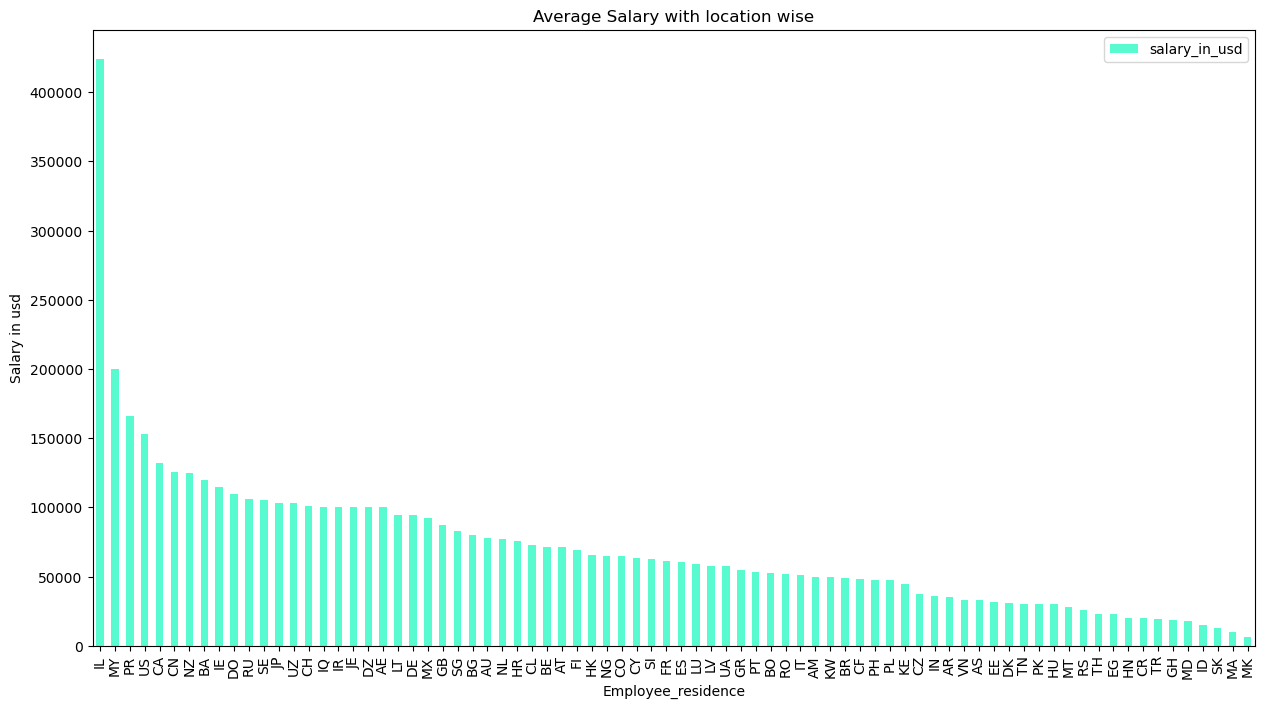

In [32]:
#Create a bar chart to understand the Avearage salary with location wise
india=data.groupby(['employee_residence'])[['salary_in_usd']].mean().sort_values(by='salary_in_usd',ascending=False)
india.plot(kind='bar',title="Average Salary with location wise",figsize=(15,8),color=['#58FAD0','#642EFE','#9F81F7','#BFFF00','#FE2EF7','#7401DF','#4B088A'])
plt.xlabel("Employee_residence")
plt.ylabel("Salary in usd")
plt.xticks(rotation=90)
plt.show()

# Observations:
+ From the Above two chart pie and bar chats what we observed.
+ In the Pie chart non Remote people get more salary with other persons.100% remote people get less salary
+ In the bar chart we abserved the average salary for the differnet location wise

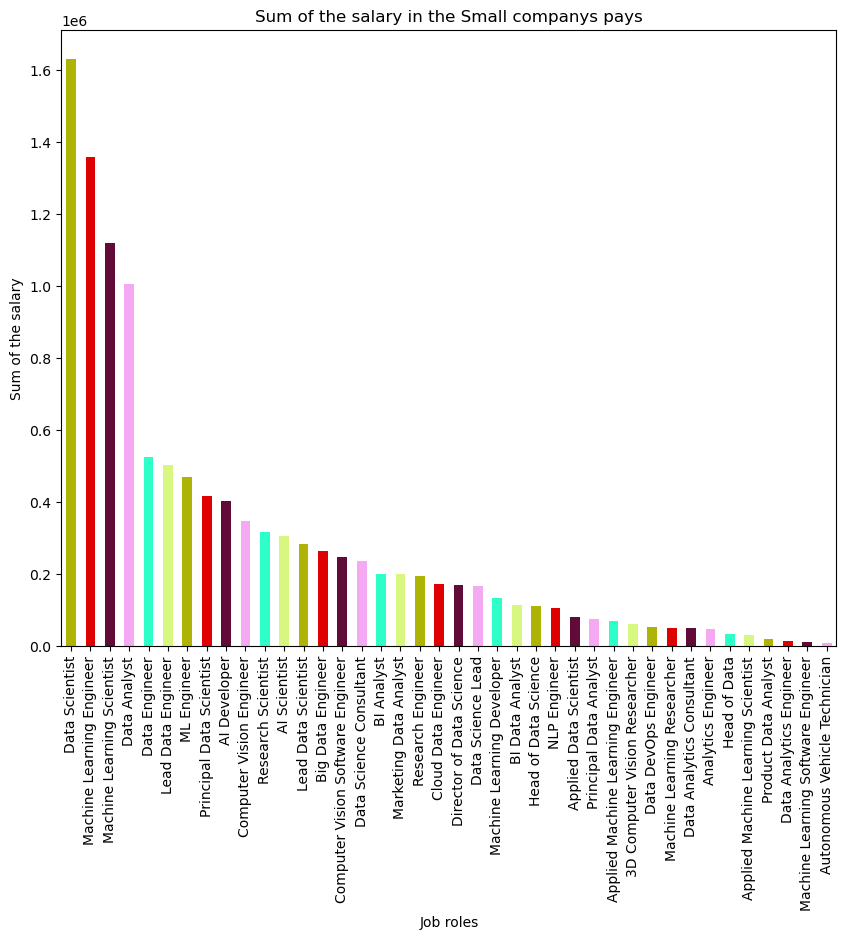

In [33]:
#How much small companys pay for the different roles
small=data['company_size']=='S'
data.loc[small].groupby(['job_title'])['salary_in_usd'].sum().sort_values(ascending=False)\
.plot(kind='bar',figsize=(10,8),title="Sum of the salary in the Small companys pays",color=['#AEB404','#DF0101','#610B38','#F5A9F2','#2EFEC8','#D8F781'])
plt.xlabel("Job roles")
plt.ylabel("Sum of the salary")
plt.show()

In [34]:
#Let's find the demand roles in the freelencing 
employment=data['employment_type']=='FL'
data.loc[employment].groupby('job_title')[['salary_in_usd']].sum().sort_values(by='salary_in_usd',ascending=False)\
.style.background_gradient(cmap='cubehelix')

,salary_in_usd
job_title,
Data Scientist,100000
Machine Learning Engineer,100000
Computer Vision Engineer,60000
Data Analytics Consultant,50000
Machine Learning Researcher,50000
Software Data Engineer,50000
Autonomous Vehicle Technician,45555
Applied Machine Learning Scientist,30523
Data Engineer,20000


# Observations:
+ From the above two part data scientist is the high paying job in the small industries and freelencing
+ We strongly understanding data scientis is the key role in the data field.

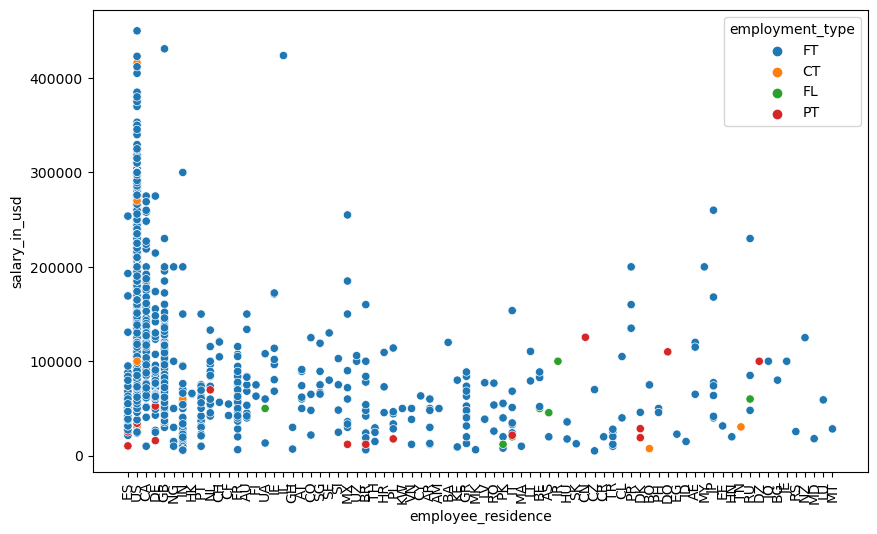

In [35]:
#Visualize the Scatterplot with employee_residence with salary in usd
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x='employee_residence',y='salary_in_usd',hue='employment_type')
plt.xticks(rotation=90)
plt.show()

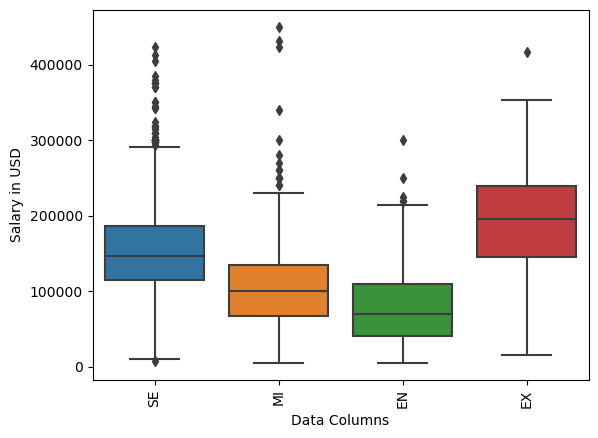

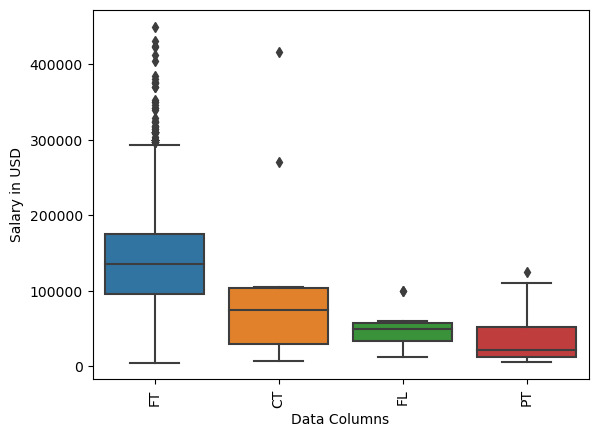

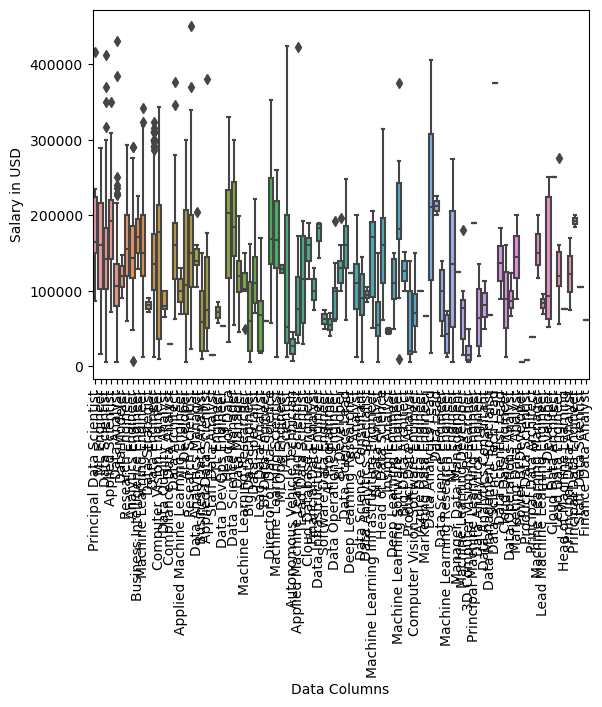

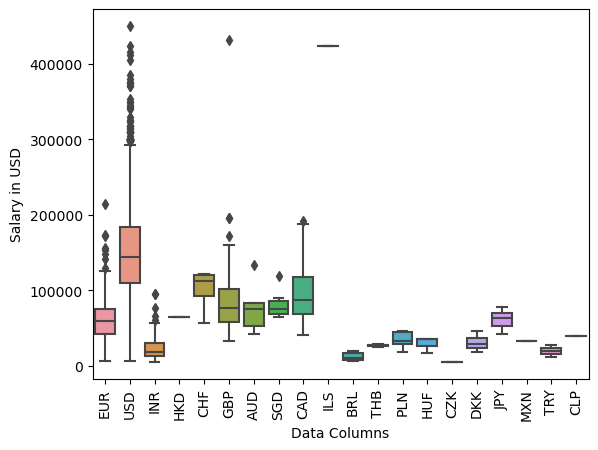

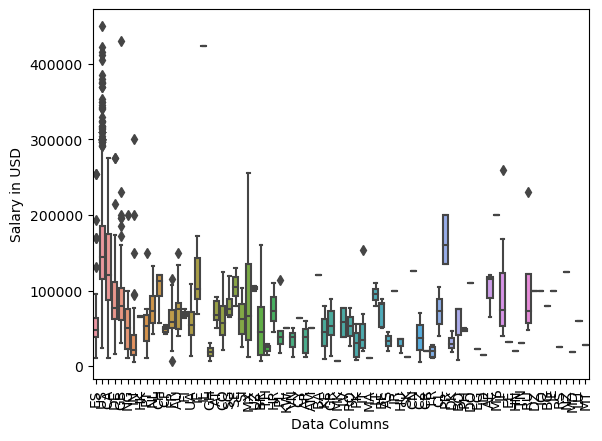

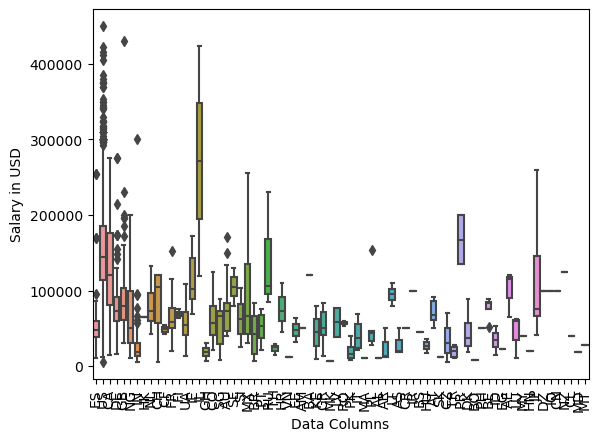

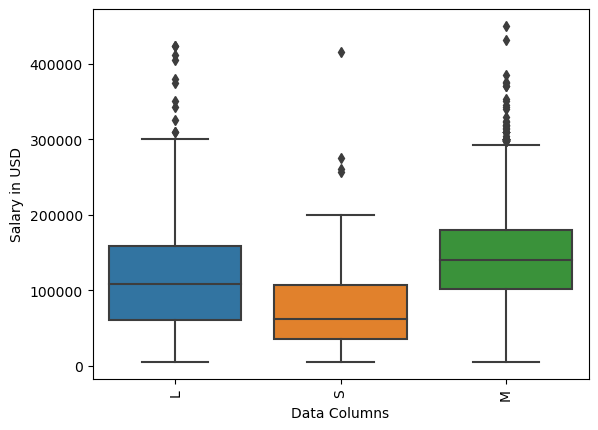

In [36]:
#Vissualize the Barplot to understanding the outliers in the each data set
for i in data.select_dtypes(include='O'):
    sns.boxplot(data=data,x=data[i],y='salary_in_usd')
    plt.xlabel("Data Columns")
    plt.ylabel("Salary in USD")
    plt.xticks(rotation=90)
    plt.show()

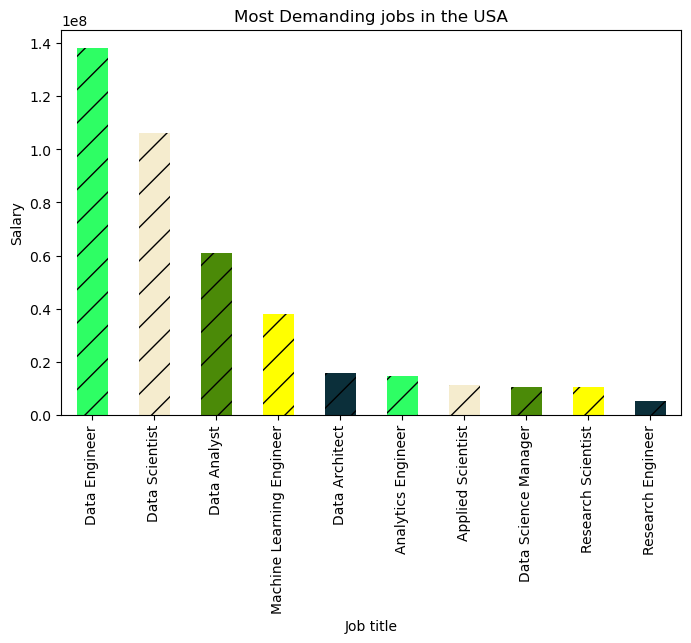

In [37]:
# Top 10 most demanding job in the USA 
usa=data['employee_residence']=='US'
data.loc[usa].groupby('job_title')['salary_in_usd'].sum().sort_values(ascending=False).head(10)\
.plot(kind='bar',title="Most Demanding jobs in the USA",figsize=(8,5),color=['#2EFE64','#F5ECCE','#4B8A08','#FFFF00','#0B2F3A'],hatch='/')
plt.xlabel("Job title")
plt.ylabel("Salary")
plt.show()

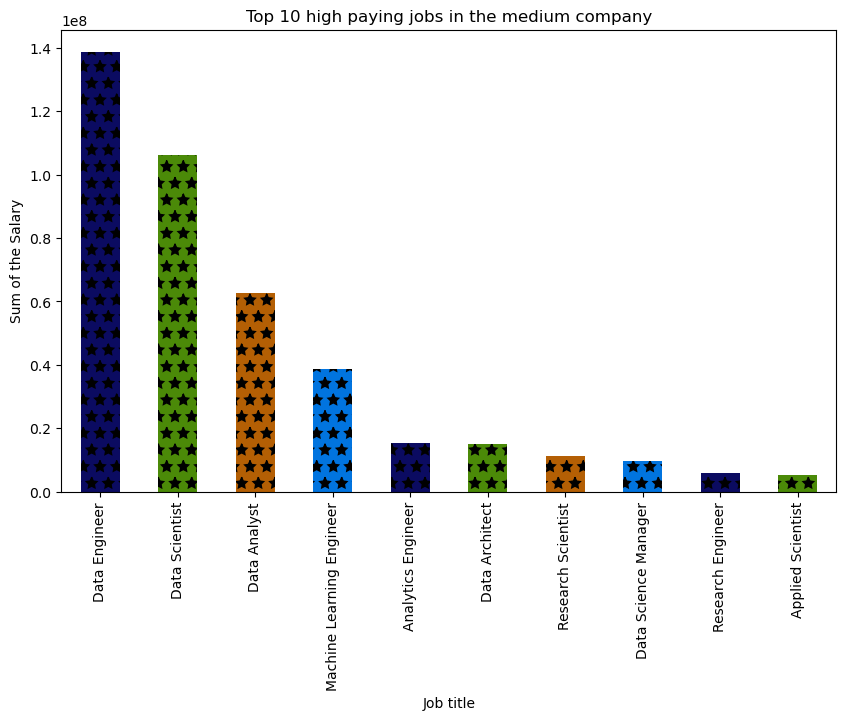

In [38]:
#Find the sum of the average salary for the median companys paying the different job roles
medium=data['company_size']=='M'
data.loc[medium].groupby('job_title')['salary_in_usd'].sum().sort_values(ascending=False).head(10)\
.plot(kind='bar',figsize=(10,6),title="Top 10 high paying jobs in the medium company",color=['#0B0B61','#4B8A08','#B45F04','#0174DF'],hatch='*')
plt.xlabel("Job title")
plt.ylabel("Sum of the Salary")
plt.show()

In [39]:
#Find the Average Salary paying the large companys with employement wise
large=data['company_size']=='L'
data.loc[large].groupby(['employment_type'])[['salary_in_usd']].sum().sort_values(by='salary_in_usd',ascending=False)\
.style.background_gradient(cmap='tab20c_r')

,salary_in_usd
employment_type,
FT,53122304
CT,370000
PT,196342
FL,20000


# Observations:
+ From the Two chart what we observed.
+ In the USA data engineer is the high paying job and Data Scientist roles second paying jobs
+ In the second chart also medium compays also pays well for Data Engineer and data Scientist roles
+ In the Large companys the full time employess get more salary compare to the other employess.

In [57]:
pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ------------ --------------------------- 92.2/300.2 kB 1.1 MB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 901.1 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/300.2 kB 871.5 kB/s eta 0:00:01
   ---------------------------------- ----- 256.0/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.1 MB/s eta 0:00:00


In [58]:
#We import the wordcloud from the 
from wordcloud import WordCloud
text3 = ' '.join(data['job_title'])
wordcloud2 = WordCloud(mode='RGB',background_color='red').generate(text3)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

TypeError: sequence item 0: expected str instance, int found

# Machine Learing Modeling

In [41]:
#Import the Standard libraries for machine Learing
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [42]:
#Convert the categorical columns into numerical using label encoder
for col in data.select_dtypes(include='object').columns:
    label_encoder=LabelEncoder()
    label_encoder.fit(data[col].unique())
    data[col]=label_encoder.transform(data[col])
    print(f'{col} : {data[col].unique()}')

experience_level : [3 2 0 1]
employment_type : [2 0 1 3]
job_title : [84 66 47  8 25 38 88  4 18 69 50 33 23 41 22 31  6  1 89 29 17  5 91 55
 32 58 45 37 73 16 49 62 13 53 74 67  3  9  7 64 21 57 34 90  2 40 14 44
 52 11 42 30 70 12 59 61 51 75 15 86 24 10 78 28 35 43 72 79 76 68  0 85
 27 26 36 46 48 20 39 77 80 87 82 71 65 54 19 63 60 81 83 92 56]
salary_currency : [ 7 19 12  9  3  8  0 16  2 11  1 17 15 10  5  6 13 14 18  4]
employee_residence : [26 75 11 20 29 56 39 32 63 57 13 12 28  5 27 74 37 38 30  4 16 68 67 69
 54 76 10 71 34 61 46 77 18  2  1  6 45 31 52 49 64 60 42 50 47  7  3 41
 35 70 15 19 17 73 14 62 21  9 59 22 25 36  0 55 44 24 33 72 66 23 40  8
 43 65 58 51 48 53]
company_location : [25 70 12 20 28 53 38 31 54 14 13 27 26 69 36 37 29 17 64  6 63 65 51 10
 60 62 67 33 71 23  2  7 43 30 49 46 61 57 41 47 58  1  3 44  4 18 40 11
 34  5 66 19 68 59 21  9 56  8 35 24  0 45 52 32 42 22 39 16 55 15 48 50]
company_size : [0 2 1]


In [44]:
#Dividing the Data into independent and dependent variable
X=data.drop(['salary','salary_in_usd'],axis=1)
y=data['salary_in_usd']
#Normalize the Data using the 
scaler=StandardScaler()
X=scaler.fit_transform(X)
#Split the data into train and test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=420)

In [49]:
#Machine Learning model buliding
def model_bulding(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mean_absulte_error=mean_absolute_error(y_test,y_pred)
    mean_squared_er=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    r2_scores=r2_score(y_test,y_pred)
    N=len(y_test)
    k=4
    r2_Score=(1-r2_scores)*(N-1)/(N-k-1)
    print('Mean_absulte_error {:.4f}'.format(mean_absulte_error))
    print('mean_squared_error {:.4f}'.format(mean_squared_er))
    print('rmse {:.4f}'.format(rmse))
    print('r2_score {:.2f}'.format(r2_Score))
#Apply the LinearRegression model to the above function
linear=LinearRegression(fit_intercept=True)
model_bulding(linear,X_train,X_test,y_train,y_test)

Mean_absulte_error 41311.1017
mean_squared_error 2930529630.5695
rmse 54134.3664
r2_score 0.70


In [50]:
#Apply the LassoRegression model to the above function
lasso=Lasso(alpha=1.0,random_state=None,selection='cyclic')
model_bulding(lasso,X_train,X_test,y_train,y_test)

Mean_absulte_error 41310.8980
mean_squared_error 2930505783.2644
rmse 54134.1462
r2_score 0.70


In [51]:
#Apply the DecisionTreeRegressor model to the above function
decision=DecisionTreeRegressor(criterion='squared_error',splitter='best',min_samples_split=5,min_samples_leaf=2)
model_bulding(decision,X_train,X_test,y_train,y_test)

Mean_absulte_error 37188.0003
mean_squared_error 2568809900.2965
rmse 50683.4283
r2_score 0.61


In [52]:
#Apply the RandomForestRegressor model to the above function
random=RandomForestRegressor(n_estimators=100,
    criterion='squared_error',
    max_depth=50)
model_bulding(random,X_train,X_test,y_train,y_test)

Mean_absulte_error 36190.4158
mean_squared_error 2408740258.9853
rmse 49078.9187
r2_score 0.57


In [53]:
#Apply the CatBoostRegressor model to the above function
from catboost import CatBoostRegressor
cat=CatBoostRegressor( iterations=1)
model_bulding(cat,X_train,X_test,y_train,y_test)

Learning rate set to 0.5
0:	learn: 54363.8911905	total: 142ms	remaining: 0us
Mean_absulte_error 43724.0630
mean_squared_error 3171860016.6931
rmse 56319.2686
r2_score 0.75


In [54]:
#Apply the CatBoostRegressor model to the above function
from xgboost import XGBRegressor
xgb=XGBRegressor( iterations=1)
model_bulding(xgb,X_train,X_test,y_train,y_test)

Mean_absulte_error 36160.0617
mean_squared_error 2437124107.9223
rmse 49367.2372
r2_score 0.58


In [55]:
#Apply the KneighborsRegressor algorithm to the model
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
model_bulding(knn,X_train,X_test,y_train,y_test)

Mean_absulte_error 39732.1315
mean_squared_error 2871773841.9315
rmse 53588.9340
r2_score 0.68


In [56]:
#Apply the KneighborsRegressor algorithm to the model
from sklearn.svm import SVC
svc=SVC()
model_bulding(svc,X_train,X_test,y_train,y_test)

Mean_absulte_error 44750.6593
mean_squared_error 3641042436.9290
rmse 60341.0510
r2_score 0.86


# conclusion:
# ***We downloaded the data from the kaggle website and do Some the data Preprocessing set ups based on the above columns we create some EDA part in the part we answerd differnt question and finally do the machine learning modeling and from the model svc get the good r2_score. So our model is good.***